<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [2]:
#Your Solution here
import pandas as pd
import sqlite3
connection = sqlite3.connect('data/chinook.db')
cursor = connection.cursor()
stm = """ select name from sqlite_master where type='table' """
rest = pd.read_sql_query(stm, connection)
print(rest)

query = """
SELECT g.Name AS Genre, AVG(t.Milliseconds) AS AvgSongLength
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY AvgSongLength DESC;
"""
cursor.execute(query)
results = cursor.fetchall()
for genre, avg_length in results:
    print(f"Genre: {genre}, Average Song Length (ms): {avg_length}")

               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1
Genre: Sci Fi & Fantasy, Average Song Length (ms): 2911783.0384615385
Genre: Science Fiction, Average Song Length (ms): 2625549.076923077
Genre: Drama, Average Song Length (ms): 2575283.78125
Genre: TV Shows, Average Song Length (ms): 2145041.0215053763
Genre: Comedy, Average Song Length (ms): 1585263.705882353
Genre: Metal, Average Song Length (ms): 309749.4438502674
Genre: Electronica/Dance, Average Song Length (ms): 302985.8
Genre: Heavy Metal, Average Song Length (ms): 297452.9285714286
Genre: Classical, Average Song Length (ms): 293867.5675675676
Genre: Jazz, Average Song Length (ms): 291755.3769230769
Genre: Rock, Average Song Length (ms): 283910.0431765613
Genre: Blues, Average Song Length (ms): 270359.7

## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [1]:
#Your Solution here
# 01
csv_df = pd.read_csv('data/chinook_data.csv')
excel_df = pd.read_excel('data/chinook_data.xlsx')
sql_df = pd.read_sql_query(query, connection)
df = pd.concat([csv_df, excel_df, sql_df])

df.head()

NameError: name 'pd' is not defined

In [3]:
df.tail()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist,AvgSongLength
20,NaN,NaN,NaN,NaN,NaN,Bossa Nova,NaN,NaN,219590.000000
21,NaN,NaN,NaN,NaN,NaN,Easy Listening,NaN,NaN,189164.208333
22,NaN,NaN,NaN,NaN,NaN,Hip Hop/Rap,NaN,NaN,178176.285714
23,NaN,NaN,NaN,NaN,NaN,Opera,NaN,NaN,174813.000000
24,NaN,NaN,NaN,NaN,NaN,Rock And Roll,NaN,NaN,134643.500000


In [4]:
df.shape

(543, 9)

In [5]:
df.info

<bound method DataFrame.info of                                      Track                           Composer  \
0   All the Best Cowboys Have Daddy Issues                                NaN   
1                                Beira Mar                       Gilberto Gil   
2                                   Brasil  Milton Nascimento, Fernando Brant   
3                             Ben Franklin                                NaN   
4             O Último Romântico (Ao Vivo)                                NaN   
..                                     ...                                ...   
20                                     NaN                                NaN   
21                                     NaN                                NaN   
22                                     NaN                                NaN   
23                                     NaN                                NaN   
24                                     NaN                                NaN

In [6]:
df.describe()

,Milliseconds,Bytes,UnitPrice,AvgSongLength
count,5.180000e+02,5.180000e+02,518.000000,2.500000e+01
mean,3.868336e+05,3.040734e+07,1.045985,6.674493e+05
std,5.258469e+05,9.602387e+07,0.230114,8.943835e+05
min,4.884000e+03,1.612660e+05,0.990000,1.346435e+05
25%,2.049758e+05,6.493416e+06,0.990000,2.249238e+05
50%,2.526950e+05,8.098298e+06,0.990000,2.640585e+05
75%,3.225330e+05,1.010645e+07,0.990000,3.029858e+05
max,2.935894e+06,5.701522e+08,1.990000,2.911783e+06


In [7]:
df.isna().sum()

Track             25
Composer         160
Milliseconds      25
Bytes             25
UnitPrice         25
Genre              0
Album             25
Artist            25
AvgSongLength    518
dtype: int64

In [8]:
df['Genre'].mode()

0    Rock
Name: Genre, dtype: object

In [9]:
df['Genre'].value_counts()

Genre
Rock                  202
Latin                  78
Alternative & Punk     62
Metal                  47
Jazz                   31
TV Shows               13
Classical              12
Blues                  12
R&B/Soul                9
Drama                   8
Soundtrack              8
Reggae                  7
Hip Hop/Rap             6
Electronica/Dance       6
Sci Fi & Fantasy        6
Alternative             6
Easy Listening          5
World                   5
Comedy                  4
Heavy Metal             4
Pop                     4
Bossa Nova              3
Science Fiction         3
Opera                   1
Rock And Roll           1
Name: count, dtype: int64

In [10]:
df[['Milliseconds' ,'Bytes' ,'UnitPrice']].corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.942266,0.956721
Bytes,0.942266,1.000000,0.941954
UnitPrice,0.956721,0.941954,1.000000


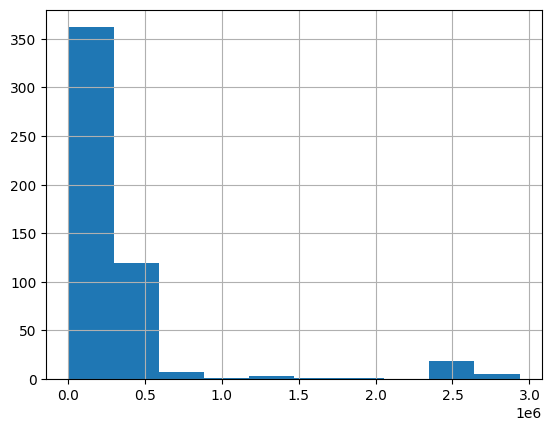

In [11]:
import matplotlib.pyplot as plt
df['Milliseconds'].hist()
plt.show()

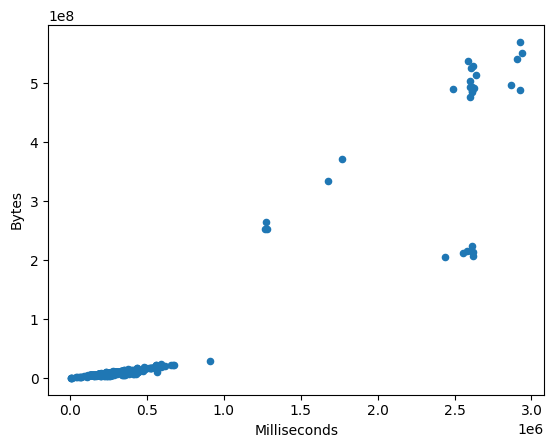

In [12]:
df.plot.scatter(x='Milliseconds',y='Bytes')
plt.show()

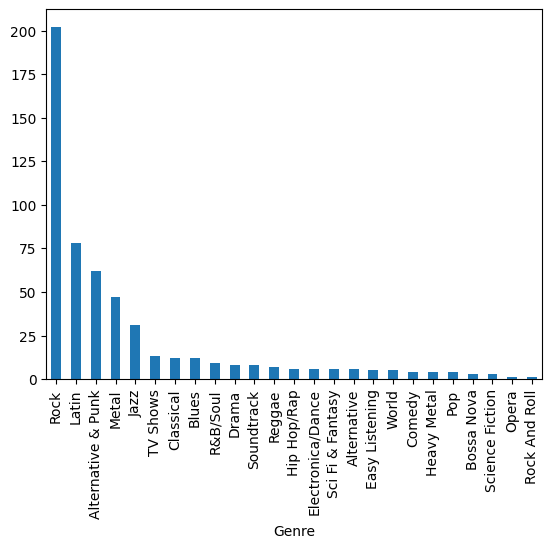

In [13]:
import matplotlib.pyplot as plt
df['Genre'].value_counts().plot.bar()
plt.show()

In [14]:
# 03 (23-27)
df.drop('AvgSongLength', axis=1, inplace=True) #because AvgSongLength have more than 500 null values
df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [15]:
only_music = df[~df['Genre'].isin(['Drama', 'TV Shows', 'SciFi & Fantasy', 'Science Fiction', 'Comedy'])]
only_music

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
1,Beira Mar,Gilberto Gil,295444.0,9597994.0,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428.0,5252560.0,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
4,O Último Romântico (Ao Vivo),NaN,231993.0,7692697.0,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
5,Freewheel Burning,NaN,265952.0,8713599.0,0.99,Metal,Living After Midnight,Judas Priest
6,That's The Way,Robert Plant,343431.0,11248455.0,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin
...,...,...,...,...,...,...,...,...
20,NaN,NaN,NaN,NaN,NaN,Bossa Nova,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,Easy Listening,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,Hip Hop/Rap,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,Opera,NaN,NaN


In [16]:
df.dropna(thresh = 2, inplace=True)
df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [17]:
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mode()[0])
df.isna().sum()

Track             0
Composer        135
Milliseconds      0
Bytes             0
UnitPrice         0
Genre             0
Album             0
Artist            0
dtype: int64

In [18]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    print(upper_boundary)
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df

df_clean = remove_outliers(df, 'Milliseconds')
df_clean

498868.875


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
1,Beira Mar,Gilberto Gil,295444.0,9597994.0,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428.0,5252560.0,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
4,O Último Romântico (Ao Vivo),NaN,231993.0,7692697.0,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
5,Freewheel Burning,NaN,265952.0,8713599.0,0.99,Metal,Living After Midnight,Judas Priest
6,That's The Way,Robert Plant,343431.0,11248455.0,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin
...,...,...,...,...,...,...,...,...
209,Black Diamond,Paul Stanley,314148.0,10266007.0,0.99,Rock,Greatest Kiss,Kiss
210,Black Dog,John Paul Jones/Robert Plant,317622.0,10267572.0,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin
212,Hey Hey,Big Bill Broonzy,196466.0,6543487.0,0.99,Blues,Unplugged,Eric Clapton
213,Everlong,Dave Grohl,250749.0,8270816.0,0.99,Rock,The Colour And The Shape,Foo Fighters


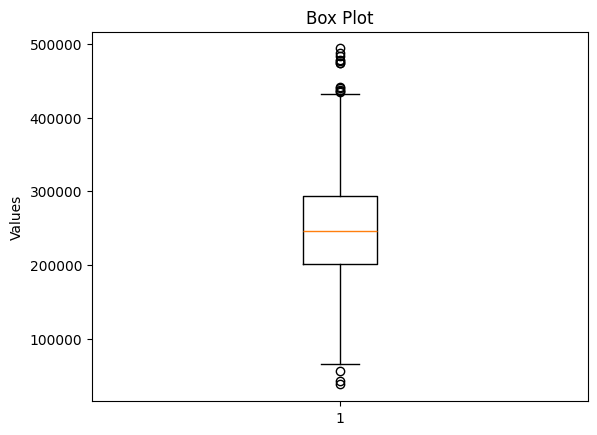

In [22]:
plt.boxplot(df_clean['Milliseconds'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

In [23]:
df.duplicated().sum()

np.int64(15)

In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [25]:
df['Milliseconds'] = df['Milliseconds'].astype('int')

In [26]:
df['Seconds'] = df['Milliseconds'] / 1000
df['len_byte_ratio'] = df['Milliseconds']/ df['Bytes']
genre_dict = {'metal': 'Metal', 'met': 'Metal'}
df['Genre'].replace(genre_dict)
df['Genre'] = df['Genre'].str.upper()
df.drop(columns=['Milliseconds'], inplace=True)

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-01-01` to `2024-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [29]:
!pip install yfinance

In [3]:
#Uplaod json file
import json

with open('data/bitcoin_price.json') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)

#Uplaod yfinance file
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='2020-11-28', # The starting date
                   end='2022-10-31', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )

# change names to be similar
btc_yf_df.columns = btc_yf_df.columns.droplevel(1)
btc_yf_df.columns = [
    '_'.join(col).strip().lower() if isinstance(col, tuple) else col.lower()
    for col in btc_yf_df.columns
]
btc_yf_df

[*********************100%***********************]  1 of 1 completed


,adj close,close,high,low,open,volume
Date,,,,,,
2020-11-28 00:00:00+00:00,17717.414062,17717.414062,17853.939453,16910.652344,17112.933594,32601040734
2020-11-29 00:00:00+00:00,18177.484375,18177.484375,18283.628906,17559.117188,17719.634766,31133957704
2020-11-30 00:00:00+00:00,19625.835938,19625.835938,19749.263672,18178.322266,18178.322266,47728480399
2020-12-01 00:00:00+00:00,18802.998047,18802.998047,19845.974609,18321.921875,19633.769531,49633658712
2020-12-02 00:00:00+00:00,19201.091797,19201.091797,19308.330078,18347.718750,18801.744141,37387697139
...,...,...,...,...,...,...
2022-10-26 00:00:00+00:00,20770.441406,20770.441406,20938.134766,20076.117188,20092.236328,58895950537
2022-10-27 00:00:00+00:00,20285.835938,20285.835938,20854.044922,20255.373047,20772.802734,49625110402
2022-10-28 00:00:00+00:00,20595.351562,20595.351562,20724.980469,20086.068359,20287.957031,43994715910


In [4]:
btc_df_jsn

,symbol,time,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...,...
2788,btcusd,1606176000000,18364.000000,19131.000000,19400.00000,18130.00000,14937.354569
2789,btcusd,1606262400000,19133.654712,18727.000000,19497.00000,18500.00000,13477.604832
2790,btcusd,1606348800000,18726.475677,17211.695801,18908.00000,16317.00000,34343.561464
2791,btcusd,1606435200000,17213.000000,17171.000000,17531.00000,16501.00000,11217.912098


In [5]:
btc_df_jsn.rename(columns ={'time':'Date'}, inplace = True)

In [6]:
btc_df_jsn

,symbol,Date,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...,...
2788,btcusd,1606176000000,18364.000000,19131.000000,19400.00000,18130.00000,14937.354569
2789,btcusd,1606262400000,19133.654712,18727.000000,19497.00000,18500.00000,13477.604832
2790,btcusd,1606348800000,18726.475677,17211.695801,18908.00000,16317.00000,34343.561464
2791,btcusd,1606435200000,17213.000000,17171.000000,17531.00000,16501.00000,11217.912098


In [7]:
print(btc_df_jsn['Date'].dtype)
print(btc_yf_df.index.dtype)

int64
datetime64[ns, UTC]


In [8]:
# change the type
btc_df_jsn['Date'] = pd.to_datetime(btc_df_jsn['Date'], unit='ms')
print(btc_df_jsn['Date'].dtype)

datetime64[ns]


In [9]:
btc_df_jsn.set_index('Date', inplace=True)
btc_df_jsn

,symbol,open,close,high,low,volume
Date,,,,,,
2013-03-31,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
2013-04-01,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
2013-04-02,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
2013-04-03,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
2013-04-04,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...
2020-11-24,btcusd,18364.000000,19131.000000,19400.00000,18130.00000,14937.354569
2020-11-25,btcusd,19133.654712,18727.000000,19497.00000,18500.00000,13477.604832
2020-11-26,btcusd,18726.475677,17211.695801,18908.00000,16317.00000,34343.561464


In [11]:
# cancatination
btc_df = pd.concat([btc_df_jsn, btc_yf_df])
btc_df

,symbol,open,close,high,low,volume,adj close
Date,,,,,,,
2013-03-31 00:00:00,btcusd,92.500000,93.033000,93.749990,91.000000,3.083080e+03,NaN
2013-04-01 00:00:00,btcusd,93.250000,103.999000,105.900000,92.499990,5.224401e+03,NaN
2013-04-02 00:00:00,btcusd,104.000000,118.229354,118.386700,99.000000,8.376527e+03,NaN
2013-04-03 00:00:00,btcusd,117.958261,134.700000,146.880000,101.510880,1.299625e+04,NaN
2013-04-04 00:00:00,btcusd,134.716560,132.899000,143.000000,119.000000,6.981668e+03,NaN
...,...,...,...,...,...,...,...
2022-10-26 00:00:00+00:00,NaN,20092.236328,20770.441406,20938.134766,20076.117188,5.889595e+10,20770.441406
2022-10-27 00:00:00+00:00,NaN,20772.802734,20285.835938,20854.044922,20255.373047,4.962511e+10,20285.835938
2022-10-28 00:00:00+00:00,NaN,20287.957031,20595.351562,20724.980469,20086.068359,4.399472e+10,20595.351562


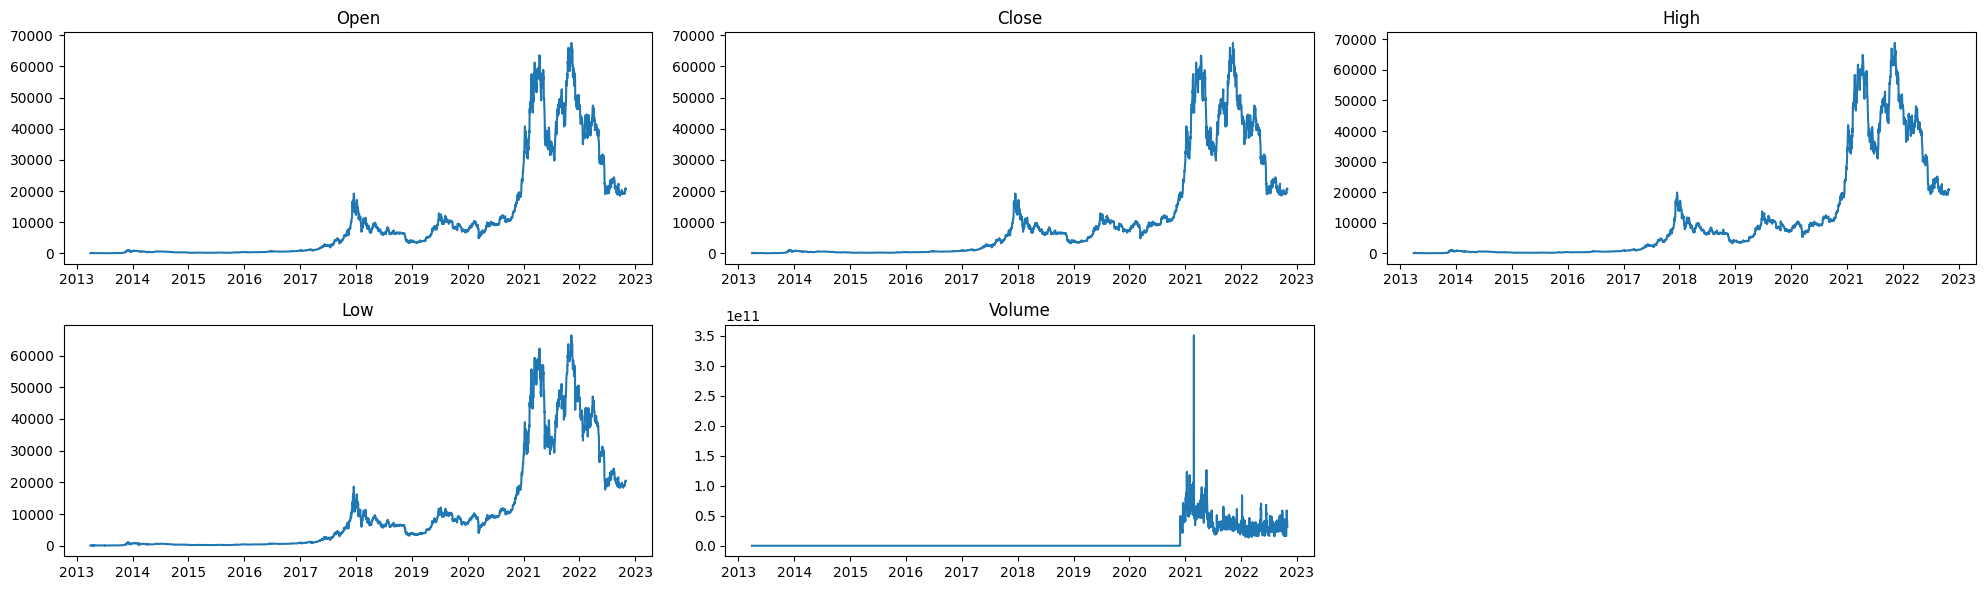

In [43]:
plt.figure(figsize=(20, 6))

plt.subplot(2, 3, 1)
plt.plot(btc_df['open'])
plt.title('Open')

plt.subplot(2, 3, 2)
plt.plot(btc_df['close'])
plt.title('Close')

plt.subplot(2, 3, 3)
plt.plot(btc_df['high'])
plt.title('High')

plt.subplot(2, 3, 4)
plt.plot(btc_df['low'])
plt.title('Low')

plt.subplot(2, 3, 5)
plt.plot(btc_df['volume'])
plt.title('Volume')

plt.tight_layout()
plt.show()

<Axes: >

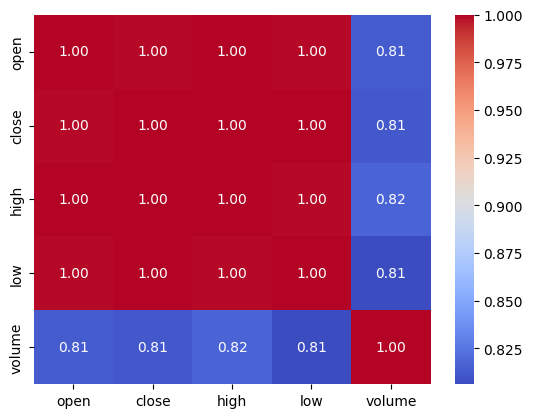

In [44]:
import seaborn as sns
correlation_matrix = btc_df[['open', 'close', 'high', 'low', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [45]:
btc_df.isna().sum()

symbol        702
open            0
close           0
high            0
low             0
volume          0
adj close    2793
dtype: int64

In [49]:
# we will replace the values of symbole by the mode and drop adj close since the company noot interested

btc_df.drop(columns='adj close', inplace=True)
btc_df['symbol'] = btc_df['symbol'].fillna('btcusd')
btc_df.columns

Index(['symbol', 'open', 'close', 'high', 'low', 'volume'], dtype='object')

In [50]:
btc_df.isna().sum()

symbol    0
open      0
close     0
high      0
low       0
volume    0
dtype: int64

In [51]:
btc_df.to_csv('btc_df_cleaned.csv')